<!-- <img src="pics/CFDS.png" width=75px>-->
<img src="../pics/DVFA-Akademie_Logo_800px.jpg" width=300px>
<br>
    <p style="color:#0E1E5E">
    <b>
        <font size="6">CFDS® – Chartered Financial Data Scientist</font>
        <br><br>
        <font size="8">Introduction to Python</font>
    </b>
<br><br>
<b>
    <font size="5"> 
        Prof. Dr. Natalie Packham <br><br>
    </font>
</b>
</p>

# Exercise on $k$-means clustering

### Machine Learning
* Machine Learning methods are split into:
   * unsupervised learning, and
   * supervised learning.
* Machine Learning problems are split into: 
   * regression, and
   * classification.
* Python offers a number of libraries for Machine Learning:
   * `scikit-learn` <http://scikit-learn.org>
   * `TensorFlow` <http://tensorflow.org>

In previous examples we investigated supervised learning algorithms in a regression setting (Ridge regression, Lasso, Elastic net) and in a classification setting (Logistic regression) as well as unsupervised learning algorithms in a regression setting (Principal component analysis). 

The following exercise is an example of unsupervised learning in a classification setting.

### Unsupervised learning
* The principal idea of unsupervised learning is to extract information from data without any guidance or feedback.
* A typical appication is **clustering** (a classification problem).
* One such algorithm is $k$-means clustering, which cluster data into $k$ subsets, called clusters.

### $k$-means clustering
* Here is how it works (see Section 10.3 of James et al., 2013):
* Let $x_1, x_2, \ldots, x_n$ denote the sample of points. 
* Let $C_1, \ldots, C_k$ denote sets containing the indices of the observations in each cluster.
* They must satisfy the following two properties: 
* Each observation belongs to at least one cluster: $C_1\cup C_2\cup\cdots \cup C_k=\{1, \ldots, n\}$. 
* Each observation belongs to no more than one cluster: $C_i\cap C_j$ for all $i,j\in \{1,\ldots, k\}$. 
* The goal is to find $k$ cluster that minimise *within-cluster-variation*.
* This is achieved by minimising least-square-distances (see James et al. for details).

$k$-means clustering therefore determines $k$ clusters $C_1, \ldots, C_k$ and assigns each point $x_i$ to exactly one cluster. 

* `scikit-learn` allows the creation of sample data sets for different types of ML problems. 
* Here we create a sample data set to illustrate $k$-means clustering.

In [13]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets.samples_generator import make_blobs

In [15]:
X, y = make_blobs(n_samples=250, centers=4, random_state=500, cluster_std=1.25) # create a sample data set with 250 samples and 4 clusters

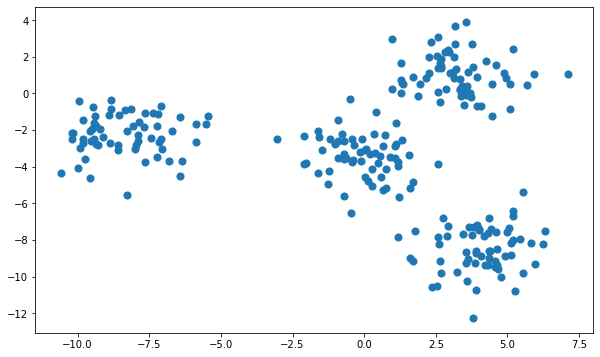

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], s=50);

__Exercise 1.__ Using the class ``sklearn.cluster.KMeans`` 

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

create a ``KMeans`` model with 4 clusters and fit the data in ``X`` to the model. 

Use ``predict`` to asssign each point to its cluster. 

Generate a scatter plot (``plt.scatter``) which colour codes the clusters (see option ``c`` in ``scatter``). 

__Solution.__

In [17]:
from sklearn.cluster import KMeans # import model class

In [18]:
model = KMeans(n_clusters=4, random_state=0) # instantiate the model
model.fit(X) # fit the model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
# predict the cluster (number) for each sample in the raw data
y_kmeans=model.predict(X)
y_kmeans[:12] # some cluster (numbers)

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1], dtype=int32)

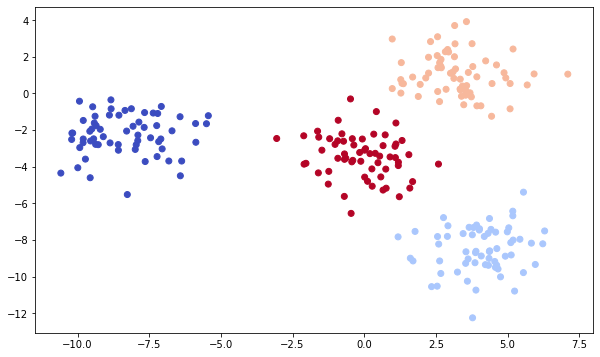

In [20]:
# plot the data with one colour per cluster
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='coolwarm');